In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

**Fuel Efficiency dataset**

The dataset contains information about the fuel efficiency (miles per gallon) of various cars along with their characteristics such as cylinders, displacement, horsepower, weight, acceleration, model year, origin, and car name.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
auto_mpg_df = pd.read_csv(url, sep='\s+', names=column_names)

# Remove rows with missing values
auto_mpg_df.replace('?', pd.NA, inplace=True)  # Replace '?' with NaN
auto_mpg_df.dropna(inplace=True)
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
# Prepare data for classification
X = auto_mpg_df.drop(columns=['car_name', 'mpg'])  # Features (excluding car_name and mpg)
y = (auto_mpg_df['mpg'] > auto_mpg_df['mpg'].median()).astype(int)  # Binary target variable (above or below median)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=10000)

**Result A (Without Sequential Eliminator)**

In [ ]:
# Train the logistic regression model
logistic_model.fit(X_train, y_train)

# Predictions using logistic regression model
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the logistic regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_percentage_without_sfe = accuracy_logistic * 100
print("Logistic Regression Accuracy:", accuracy_percentage_without_sfe, "%")

Logistic Regression Accuracy: 87.34177215189874 %


**Result B (With Sequential Feature Eliminator)**

In [ ]:
# Sequential Feature Elimination with Logistic Regression
sfs_logistic = SequentialFeatureSelector(logistic_model, n_features_to_select=2, direction='backward')
sfs_logistic.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(max_iter=10000),
                          n_features_to_select=2)

**Ranked Features to most and least importance**

In [ ]:
# Get selected feature indices
selected_feature_indices = sfs_logistic.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Get feature importance scores
feature_importance_scores = abs(logistic_model.coef_[0])

# Combine feature names and importance scores into a DataFrame
a={'Feature': selected_feature_names,'Importance': feature_importance_scores}
feature_importance_df = pd.DataFrame.from_dict(a,orient='index')
feature_importance_df=feature_importance_df.transpose()
# Rank features by importance
ranked_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print ranked features
print("Ranked Features:")
ranked_features


Ranked Features:


,Feature,Importance
6,NaN,0.66241
5,NaN,0.27929
4,NaN,0.248689
0,weight,0.176421
2,NaN,0.091385
1,model_year,0.00482
3,NaN,0.003256


In [ ]:
# Transform the features to select only the important ones
X_train_sfs_logistic = sfs_logistic.transform(X_train)
X_test_sfs_logistic = sfs_logistic.transform(X_test)

# Train the logistic regression model using the selected features
logistic_model.fit(X_train_sfs_logistic, y_train)

# Predictions using logistic regression model
y_pred_logistic = logistic_model.predict(X_test_sfs_logistic)

# Evaluate the logistic regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_percentage_with_sfe = accuracy_logistic * 100
print("Logistic Regression Accuracy:", accuracy_percentage_with_sfe, "%")

Logistic Regression Accuracy: 89.87341772151899 %


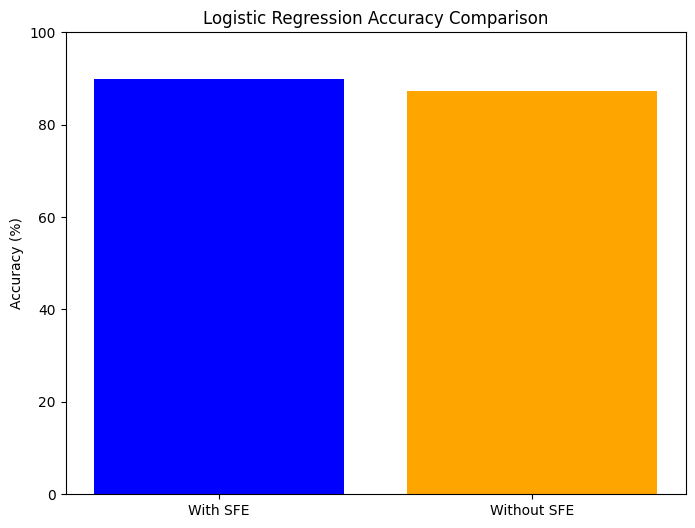

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
with_sfe_accuracy = accuracy_percentage_with_sfe
without_sfe_accuracy = accuracy_percentage_without_sfe

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(["With SFE", "Without SFE"], [with_sfe_accuracy, without_sfe_accuracy], color=['blue', 'orange'])
plt.title('Logistic Regression Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()


Text(0, 0.5, 'Accuracy (%)')

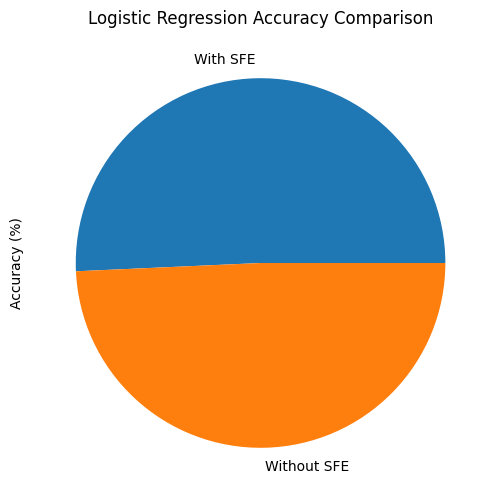

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie([with_sfe_accuracy,without_sfe_accuracy],labels=["With SFE","Without SFE"])
plt.title('Logistic Regression Accuracy Comparison')
plt.ylabel('Accuracy (%)')

4. Well we noticed that the accuracy of the model increased. However it is   important to be aware of its limitation and use it correctly. Yes the performance of the algorithm did get better since the accuracy was higher when we implemented the model without applying the sequential feature. The accuracy with SFE =89% while the accuracy without SFE =87%

5. 
Recursive Feature Elimination (RFE):
    Documentation and implementation in scikit-learn: 

    sklearn.feature_selection.RFE

    https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

    https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/

Random Forest Feature Importance:

    Documentation for Random Forest feature importance in scikit-learn: 
    
    sklearn.ensemble.RandomForestClassifier.feature_importances
    
    https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
    
    https://mljar.com/blog/feature-importance-in-random-forest/

